# 1. Plot mAP vs aternative metrics calculated from simulated data (Figures 2, S2-5)


We generated perturbation and control profiles such that each perturbation had 2 to 4 replicates, in experiments with 12, 24, or 36 control replicates (in all combinations). The simulated profiles varied in feature size, ranging from 100 to 5,000, representing a typical range for various kinds of profiles, particularly after feature reduction or selection. Specificed number of features between 1 and 100% were perturbed (i.e. sampled from a different distribution).

In [1]:
import pandas as pd

from map_utils.plot import set_plotting_style
from simulation_utils import (
    plot_simulation_results,
    get_figure2_palette,
    get_figureS5_palette,
)

In [2]:
set_plotting_style()

figure2_palette = get_figure2_palette()
figure_S5_palette = get_figureS5_palette()

### Benchmarking mAP against mp-value, MMD, and k-means on simulated data (Figure 2)

- controls and unperturbed features ~ N(0,1)
- perturbed features ~ N(1,1)

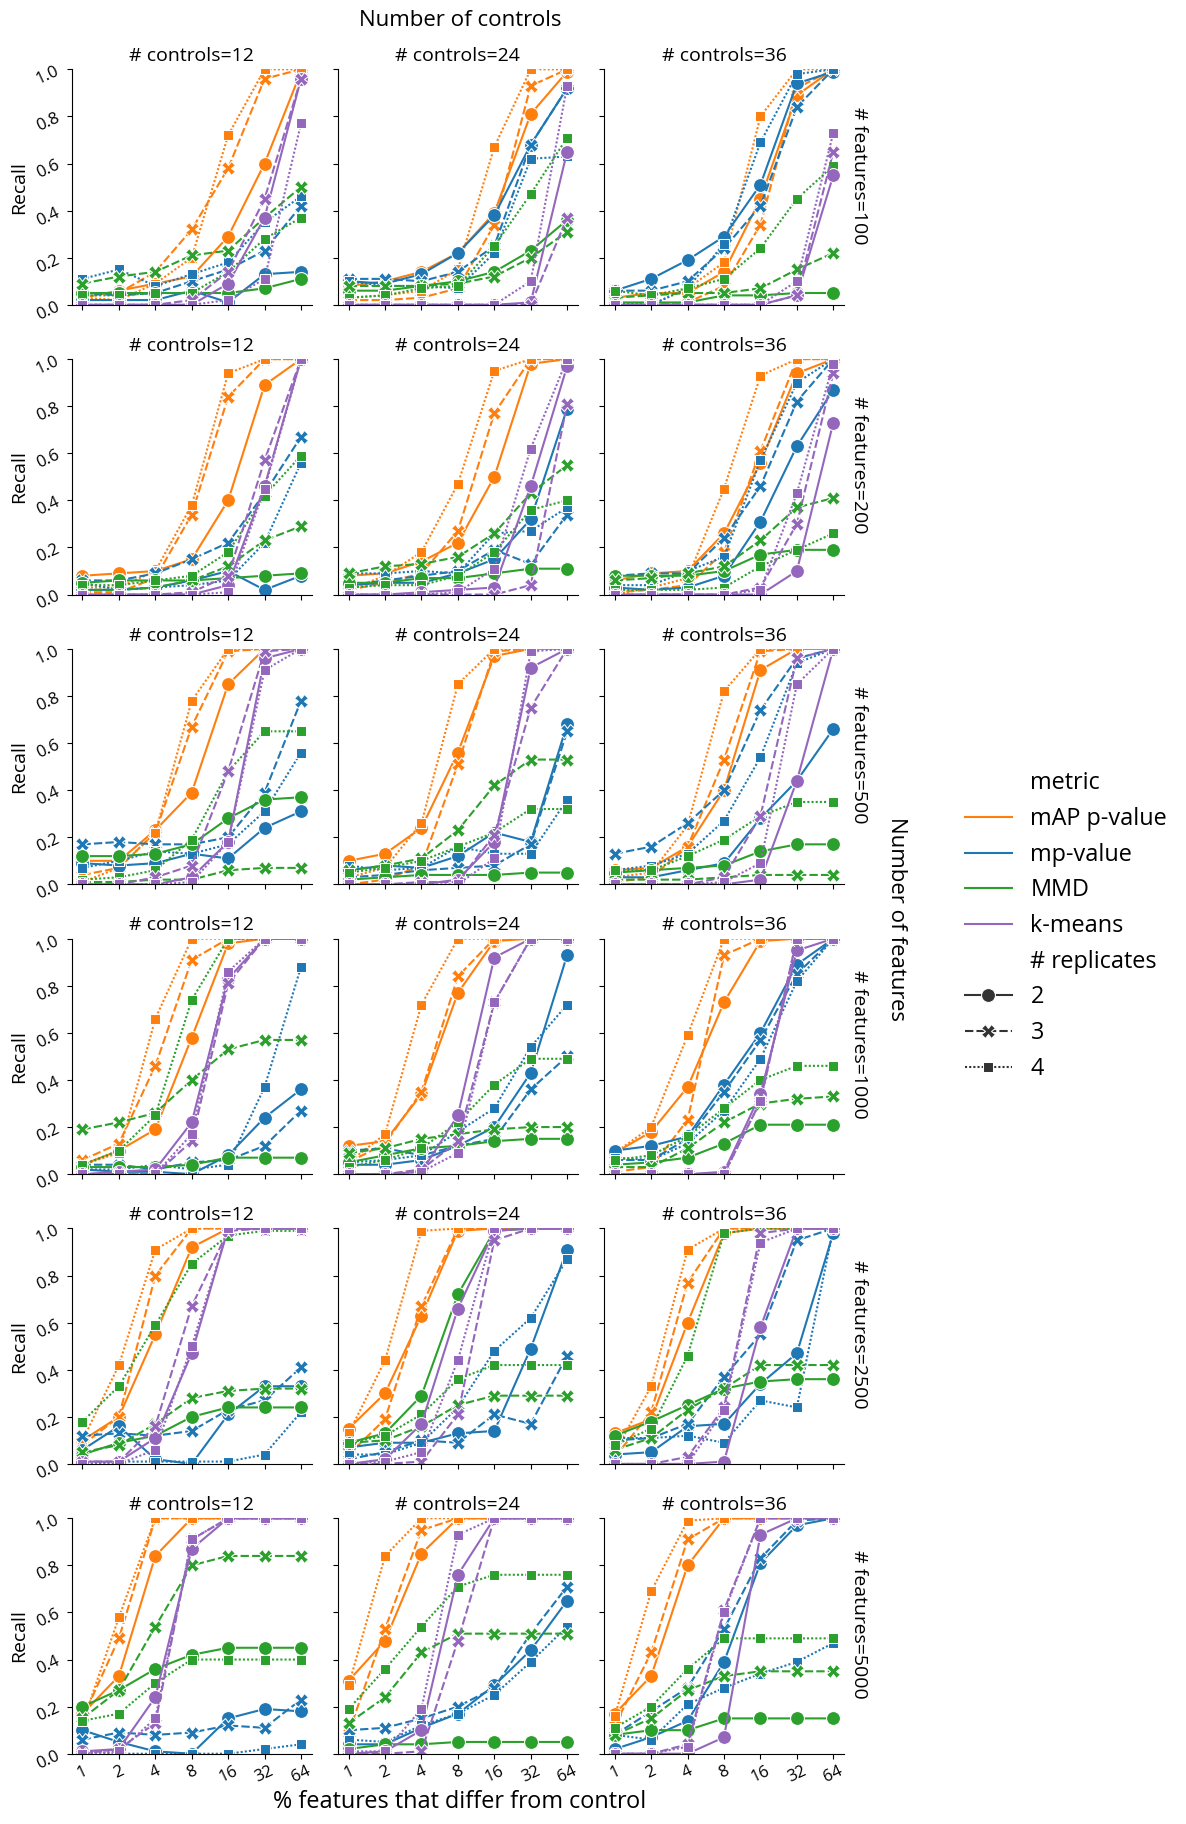

In [3]:
plot_simulation_results(
    pd.read_csv("results/fig2_results.csv"),
    ["mAP p-value", "mp-value", "MMD", "k-means"],
    palette=figure2_palette,
)

### Benchmarking mAP against mp-value, MMD, and k-means on simulated data (Figure S2)

- controls and unperturbed features ~ N(0,1)
- perturbed features ~ N(1,1)

Same as Figure 2, but changed X axis to 0-100% feature change with 10% step

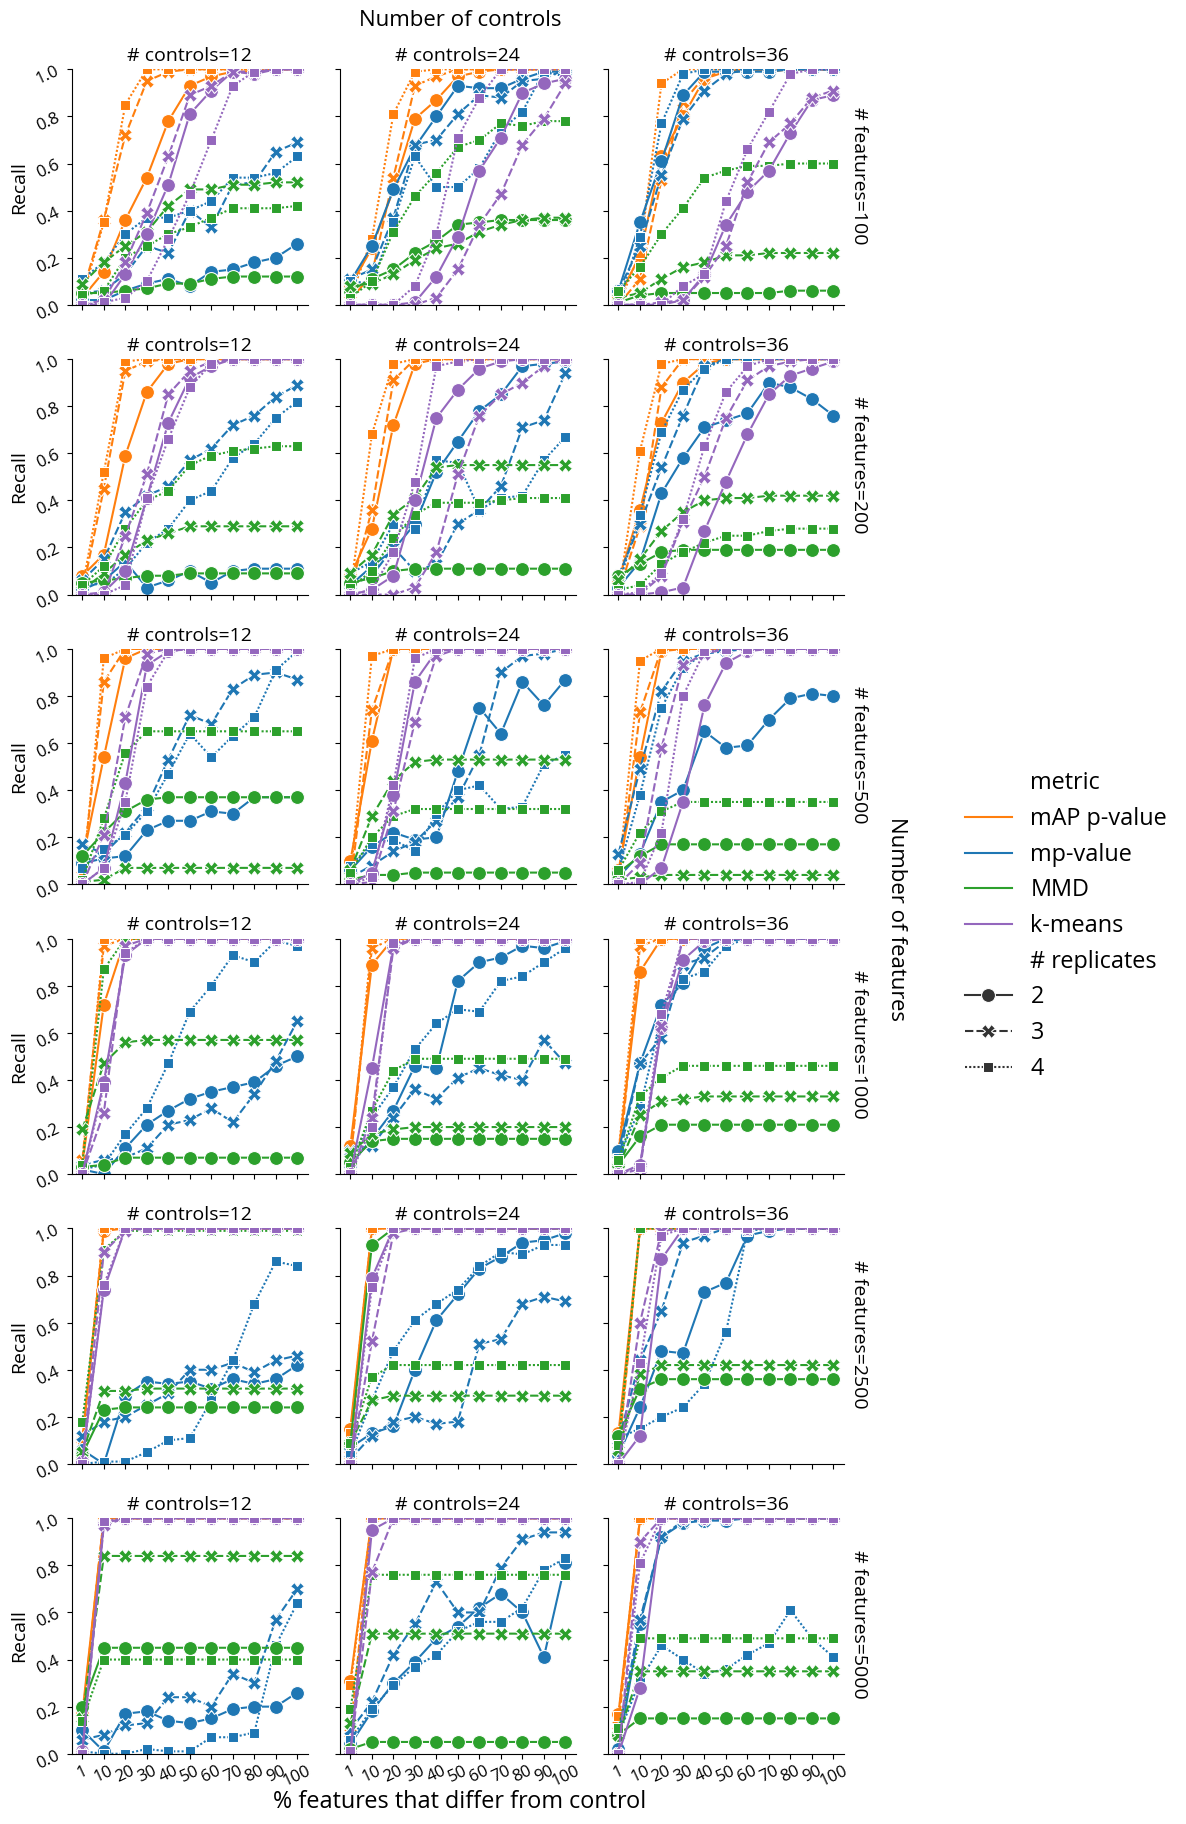

In [4]:
plot_simulation_results(
    pd.read_csv("results/fig_s2_results.csv"),
    ["mAP p-value", "mp-value", "MMD", "k-means"],
    palette=figure2_palette,
)

### Benchmarking mAP against mp-value, MMD, and k-means on simulated data (Figure S3)

- controls and unperturbed features ~ N(0,1)
- perturbed features ~ N(2,2)

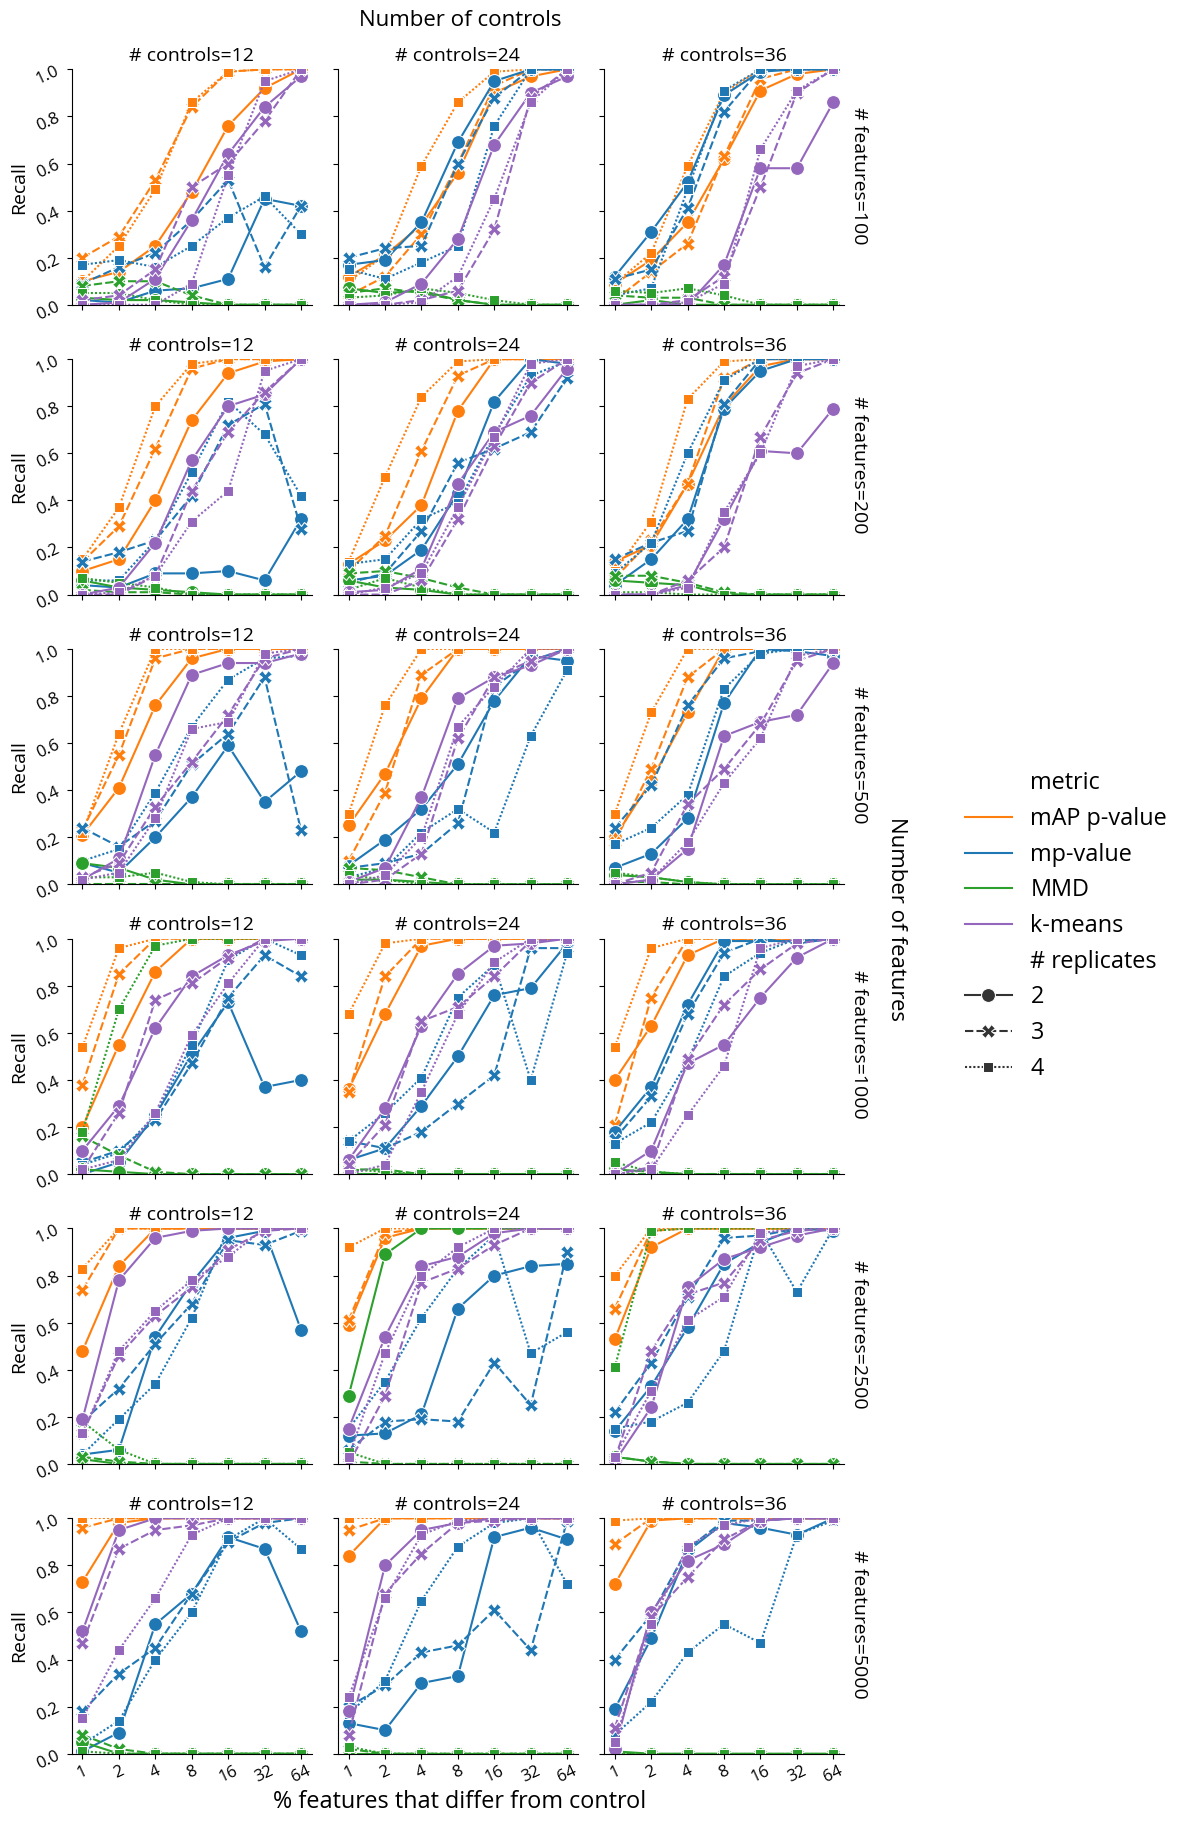

In [5]:
plot_simulation_results(
    pd.read_csv("results/fig_s3_results.csv"),
    ["mAP p-value", "mp-value", "MMD", "k-means"],
    palette=figure2_palette,
)

### Benchmarking mAP against mp-value, MMD, and k-means on simulated data (Figure S4)

- controls and unperturbed features ~ Cauchy(0,1)
- perturbed features ~ Cauchy(10,1)

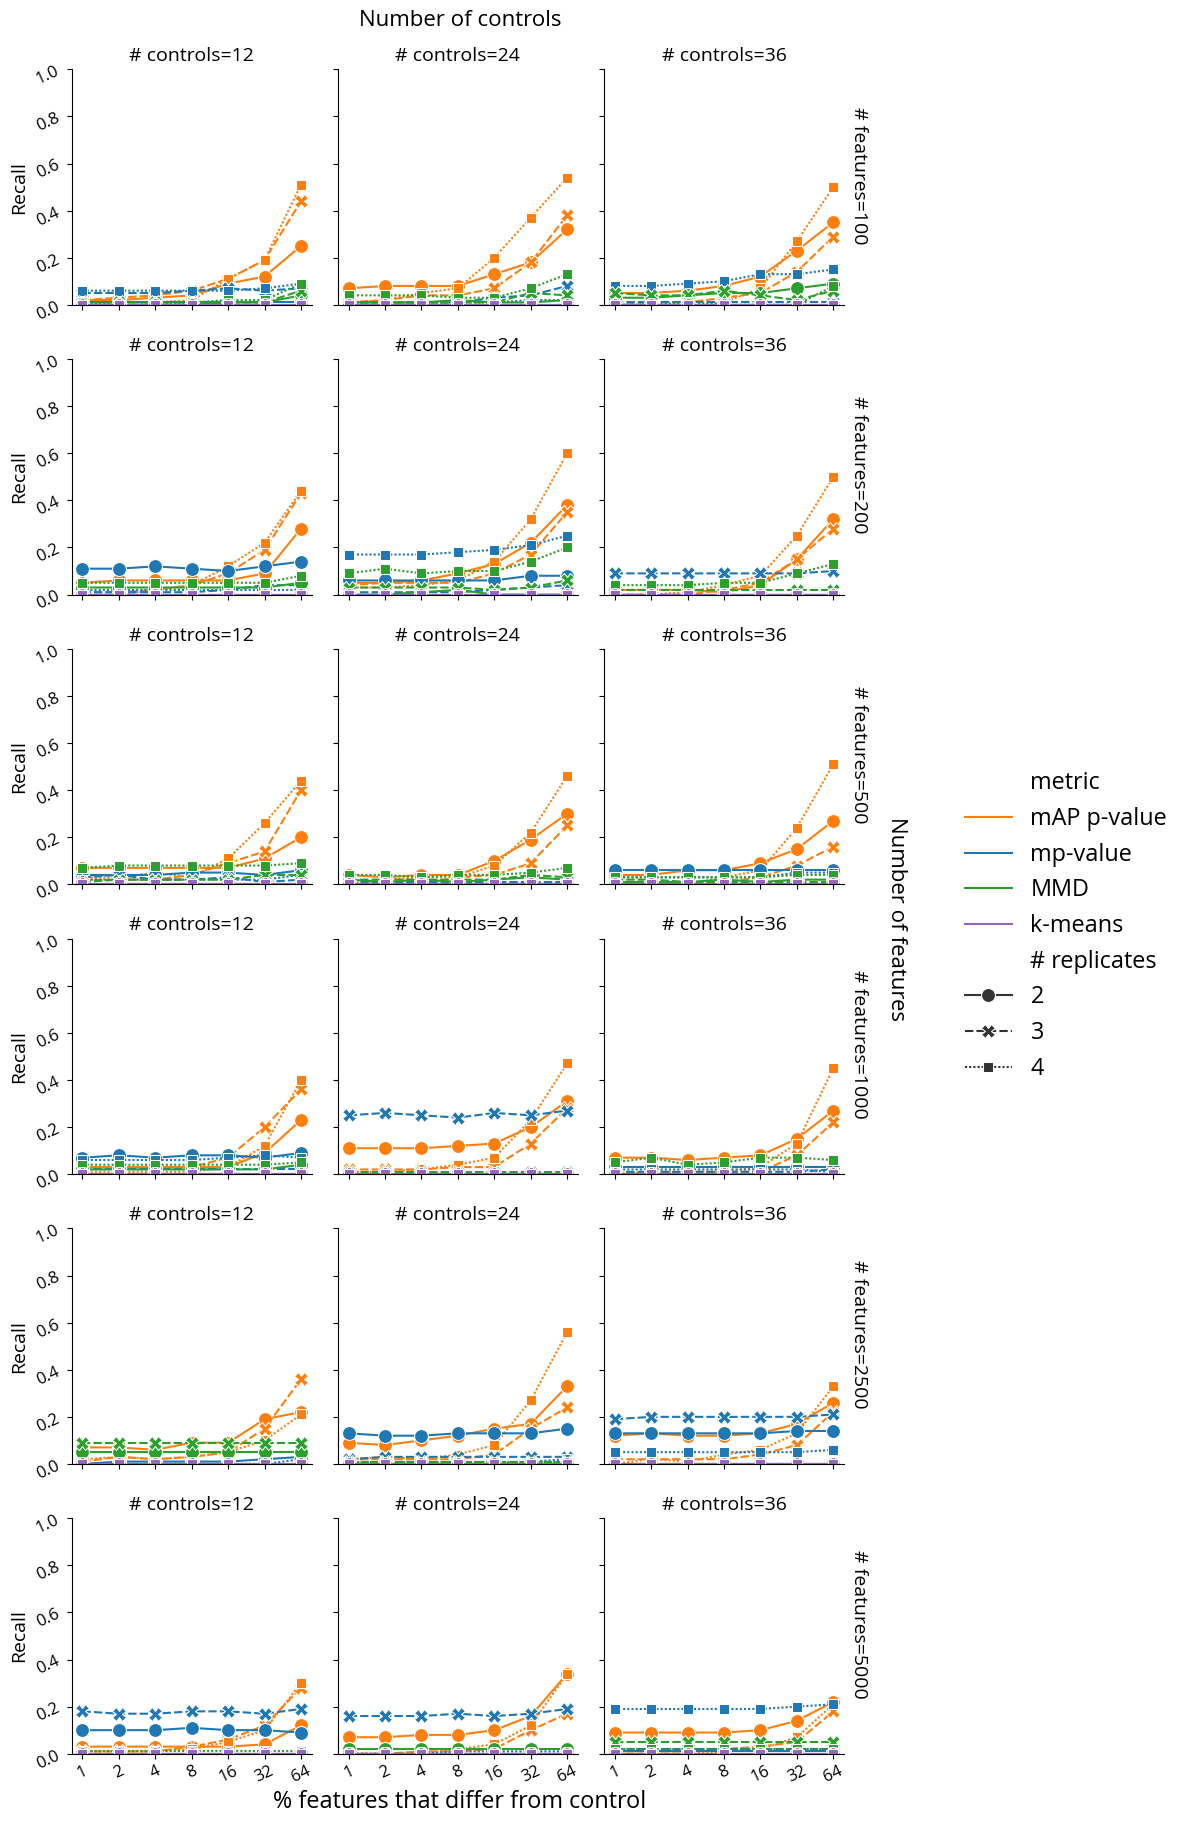

In [6]:
plot_simulation_results(
    pd.read_csv("results/fig_s4_results.csv"),
    ["mAP p-value", "mp-value", "MMD", "k-means"],
    palette=figure2_palette,
)

### Benchmarking mAP using different underlying distances (Figure S5)

- controls and unperturbed features ~ N(0,1)
- perturbed features ~ N(1,1)

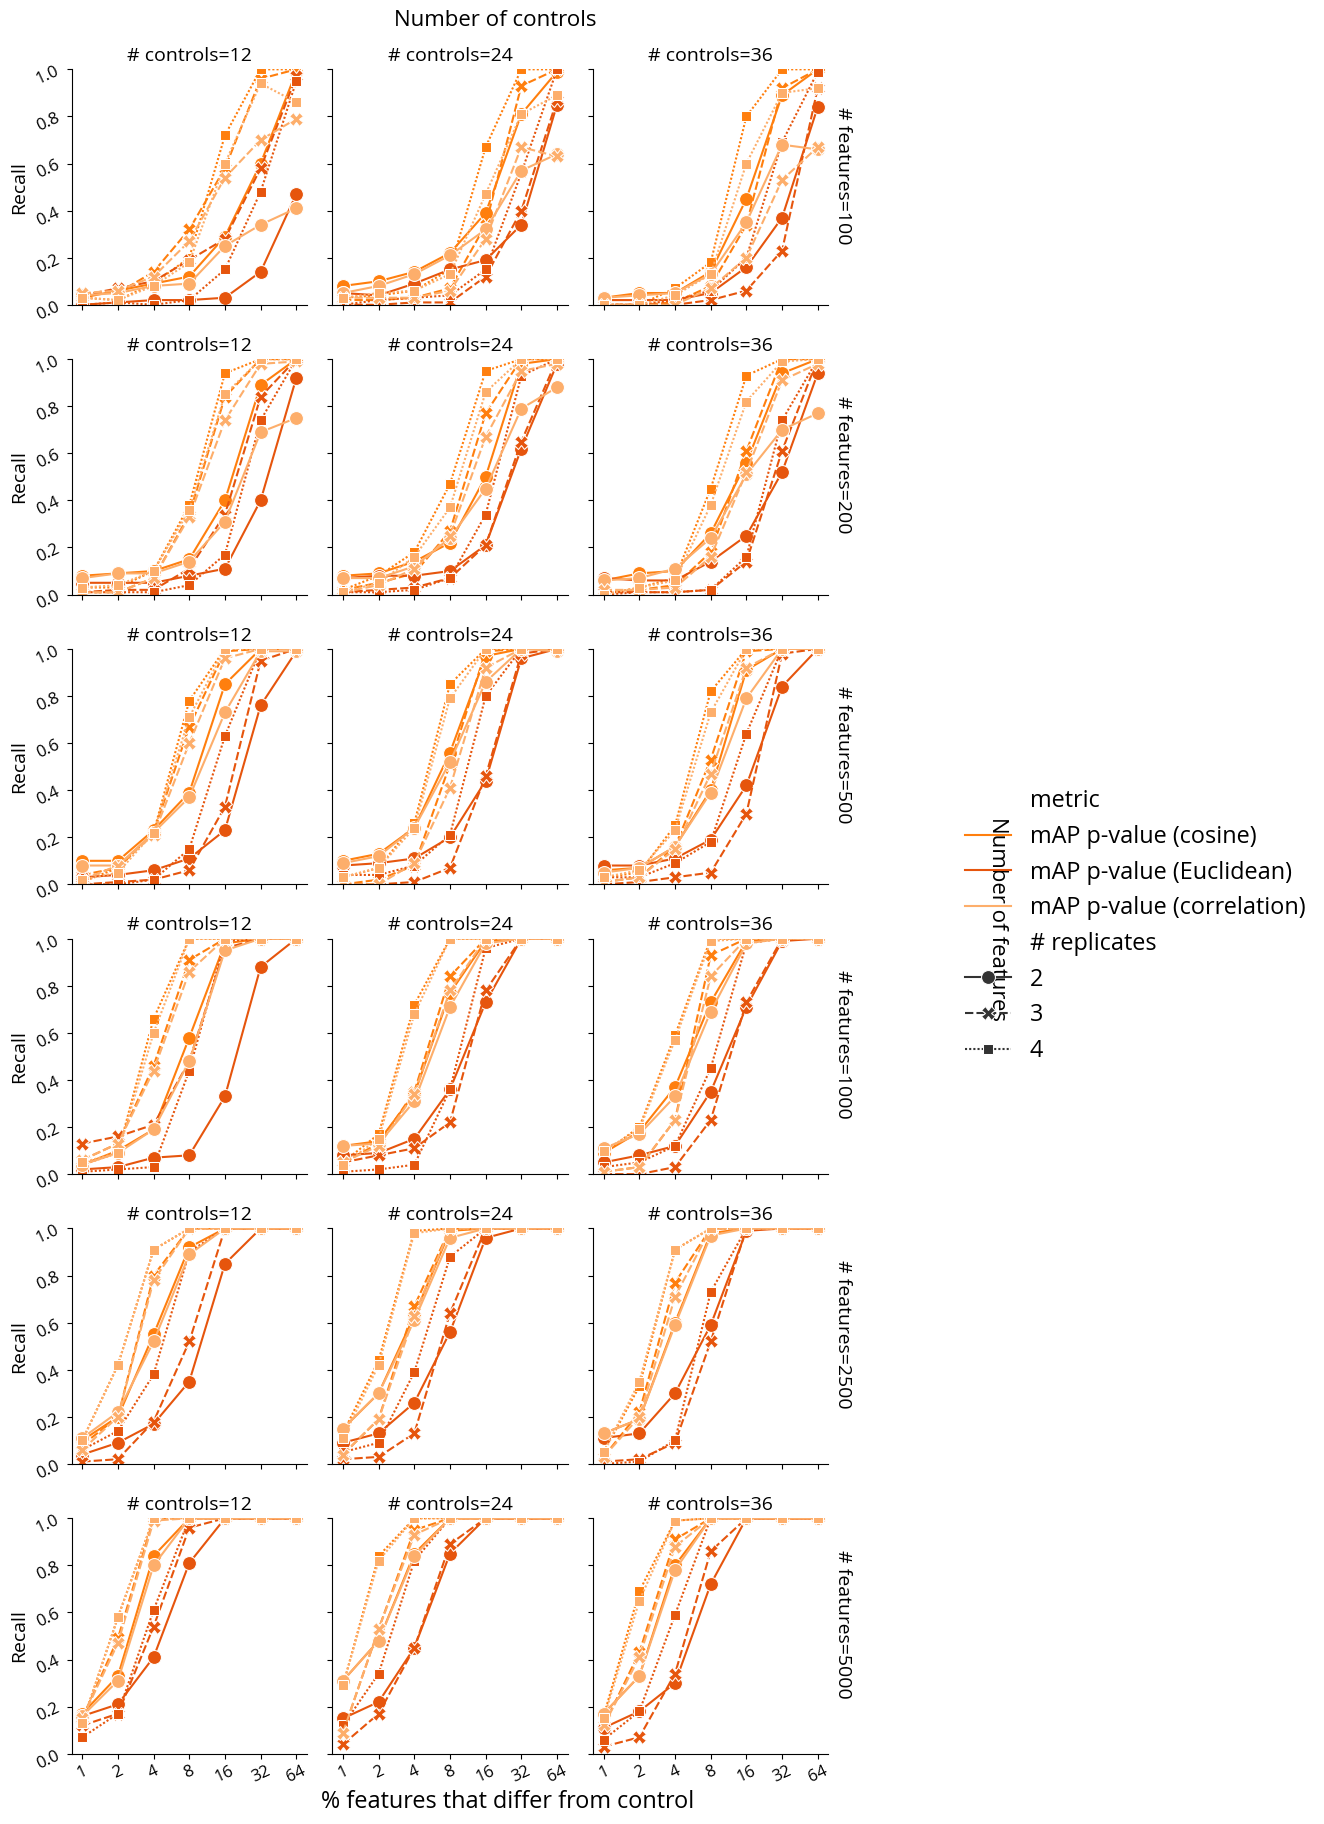

In [7]:
distances_df = pd.read_csv("results/fig2_results.csv")
euclidean_df = pd.read_csv("results/fig_s5_euc_results.csv")
correlation_df = pd.read_csv("results/fig_s5_corr_results.csv")

distances_df.rename(columns={"mAP p-value": "mAP p-value (cosine)"}, inplace=True)
distances_df["mAP p-value (Euclidean)"] = euclidean_df["mAP p-value"]
distances_df["mAP p-value (correlation)"] = correlation_df["mAP p-value"]

plot_simulation_results(
    distances_df,
    metrics=[
        "mAP p-value (cosine)",
        "mAP p-value (Euclidean)",
        "mAP p-value (correlation)",
    ],
    palette=figure_S5_palette,
)